<a href="https://colab.research.google.com/github/ShahrukhS/CE888-Data-Science/blob/main/Lab_6/Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df_country = pd.read_csv('https://raw.githubusercontent.com/ShahrukhS/CE888-Data-Science/main/Lab_6/dataset/Country-data.csv')
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/ShahrukhS/CE888-Data-Science/main/Lab_6/dataset/data-dictionary.csv')

In [24]:
df_dictionary.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [3]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


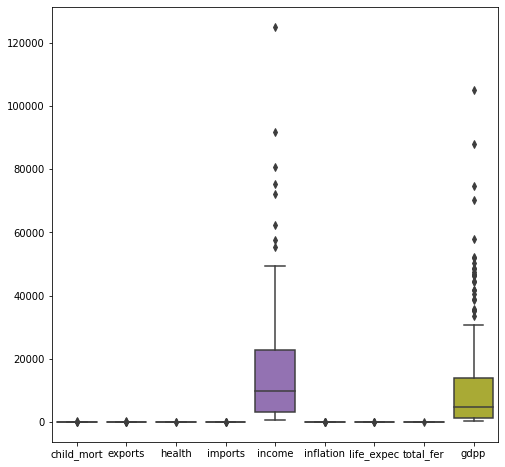

In [11]:
fig = plt.figure(figsize = (8,8))
sns.boxplot(data=df_country)
plt.show()

In [12]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

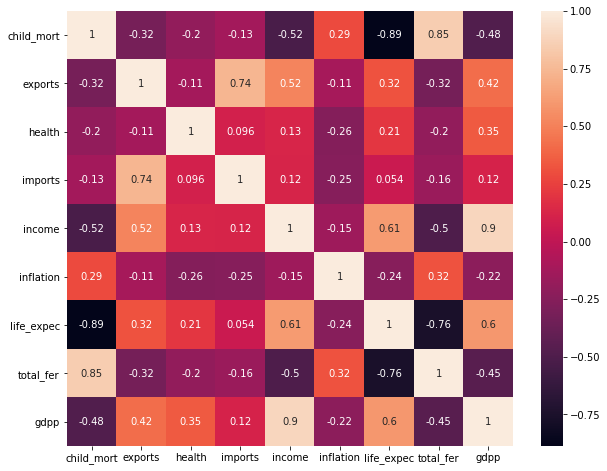

In [13]:
%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(df_country.corr(),annot = True)
plt.show()

In [6]:
X= df_country.iloc[:,1:].copy()

In [9]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

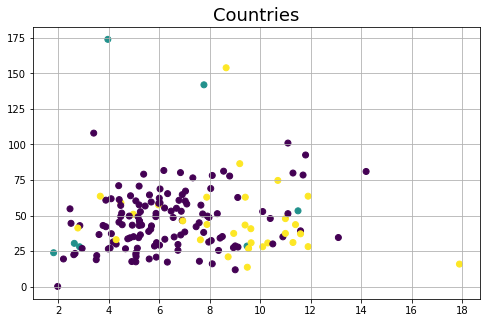

In [10]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [14]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [15]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

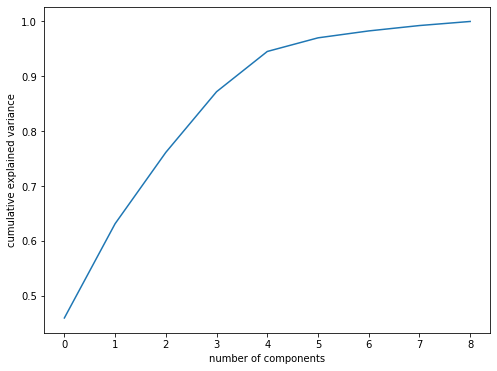

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [17]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit_predict(X_pca)
k_means.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

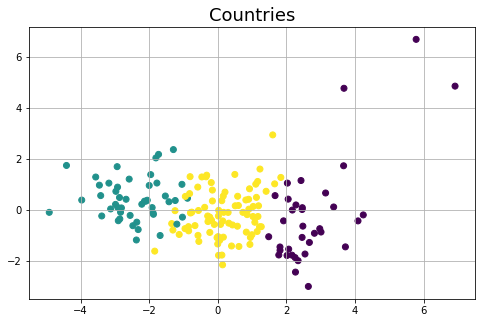

In [18]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X_pca[:,0],X_pca[:,1], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [19]:
df_country['predicted_class']= k_means.labels_

In [20]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_pca, k_means.labels_))

Silhouette Coefficient: 0.283


In [21]:
df_country.loc[df_country['predicted_class']==1, 'Country_Group']= 'Under Developing Country'
df_country.loc[df_country['predicted_class']==2, 'Country_Group']= 'Developing Country'
df_country.loc[df_country['predicted_class']==0, 'Country_Group']= 'Developed Country'

In [22]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predicted_class,Country_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developing Country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Developing Country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Developing Country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developing Country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Developing Country


In [28]:
output = ['country', 'Country_Group']
df= df_country[output].copy()

In [31]:
df.head()

,country,Country_Group
0,Afghanistan,Under Developing Country
1,Albania,Developing Country
2,Algeria,Developing Country
3,Angola,Under Developing Country
4,Antigua and Barbuda,Developing Country
